In [7]:
%pip install seaborn
%pip install folium

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [9]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [10]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [11]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Creating Visualizations for Data Analysis

#### TASK 1.1: Develop a Line chart 

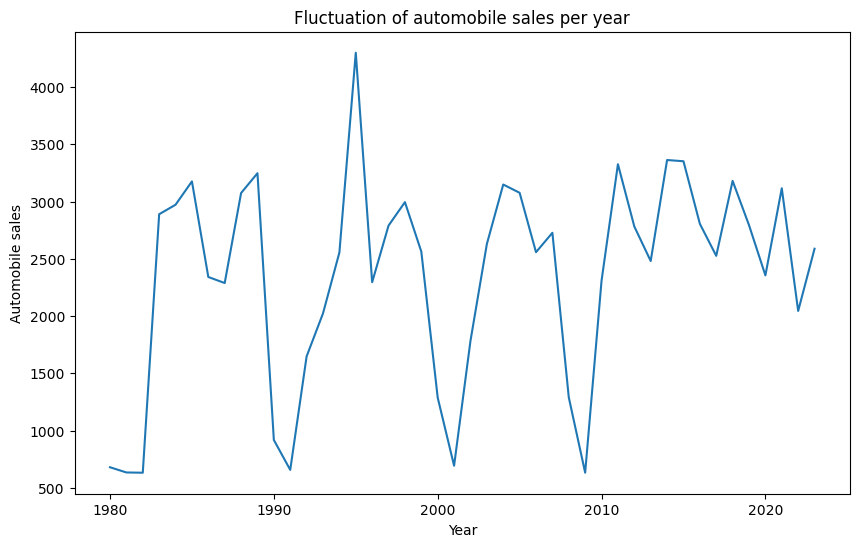

In [15]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
    #create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Automobile sales')
plt.title('Fluctuation of automobile sales per year')
plt.show()

recession period 1 - year 1980
recession period 2 - year 1981 to 1982
recession period 3 - year 1991
recession period 4 - year 2000 to 2001
recession period 5 - year end 2007 to mid 2009
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

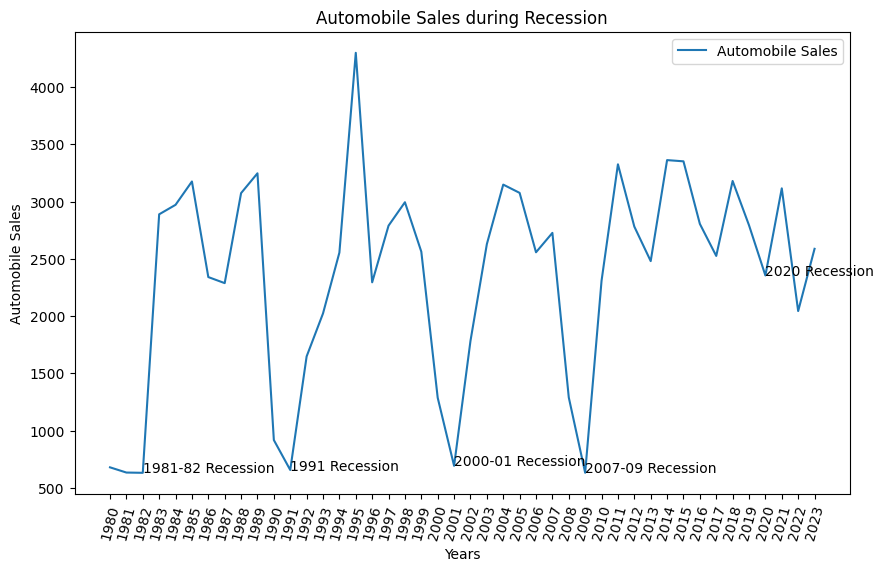

In [22]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Years')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, df_line.loc[1982], '1981-82 Recession')
plt.text(1991, df_line.loc[1991], '1991 Recession')
plt.text(2001, df_line.loc[2001], '2000-01 Recession')
plt.text(2009, df_line.loc[2009], '2007-09 Recession')
plt.text(2020, df_line.loc[2020], '2020 Recession')    
plt.legend(['Automobile Sales'])
plt.show()

#### TASK 1.2: Plot different line

In [ ]:
  df_rec = df[df['Recession']==1]
    df_Mline = df_rec.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
    df_Mline.set_index('Year', inplace=True)
    df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
    df_Mline.plot(kind='line')
    plt.xlabel('..............')
    plt.ylabel('............')
    plt.title('Sales Trend Vehicle-wise during Recession')
    plt.legend()
    plt.show()

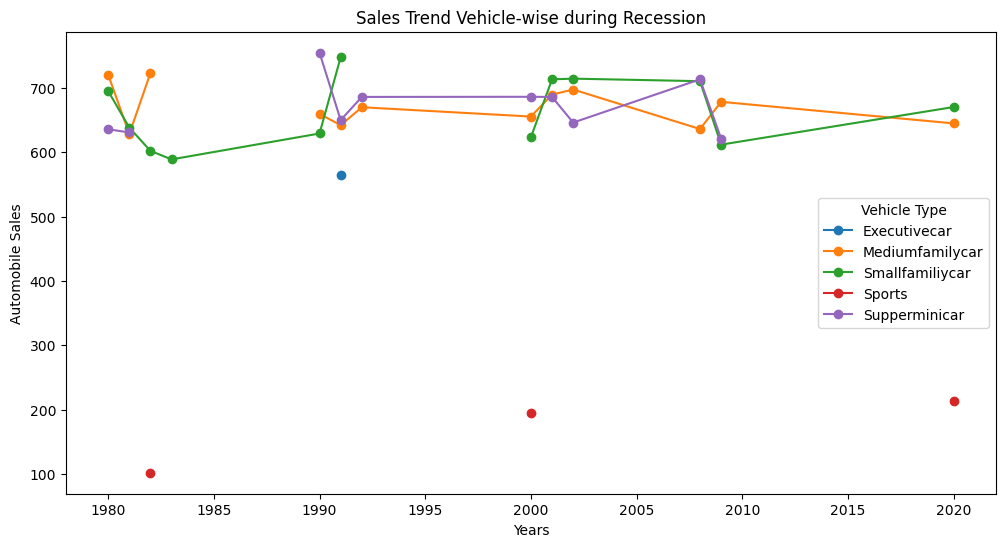

In [24]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.pivot(columns='Vehicle_Type', values='Automobile_Sales')

# Créer le graphique en ligne
df_Mline.plot(kind='line', marker='o', figsize=(12, 6))

plt.xlabel('Years')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')

plt.legend(title='Vehicle Type')
plt.show()

#### TASK 1.3: Use the functionality of Seaborn Library

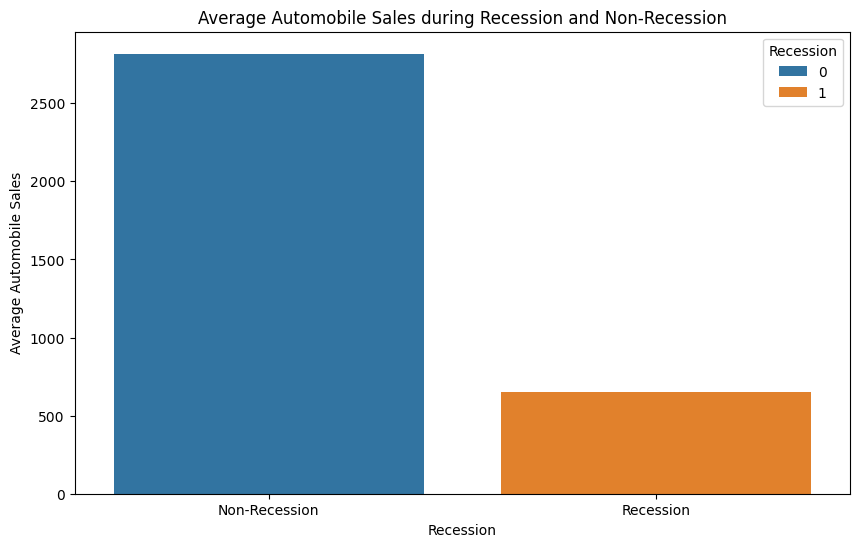

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les ventes moyennes par période de récession
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Créer le graphique en barres avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

#### TASK 1.4: Use sub plotting

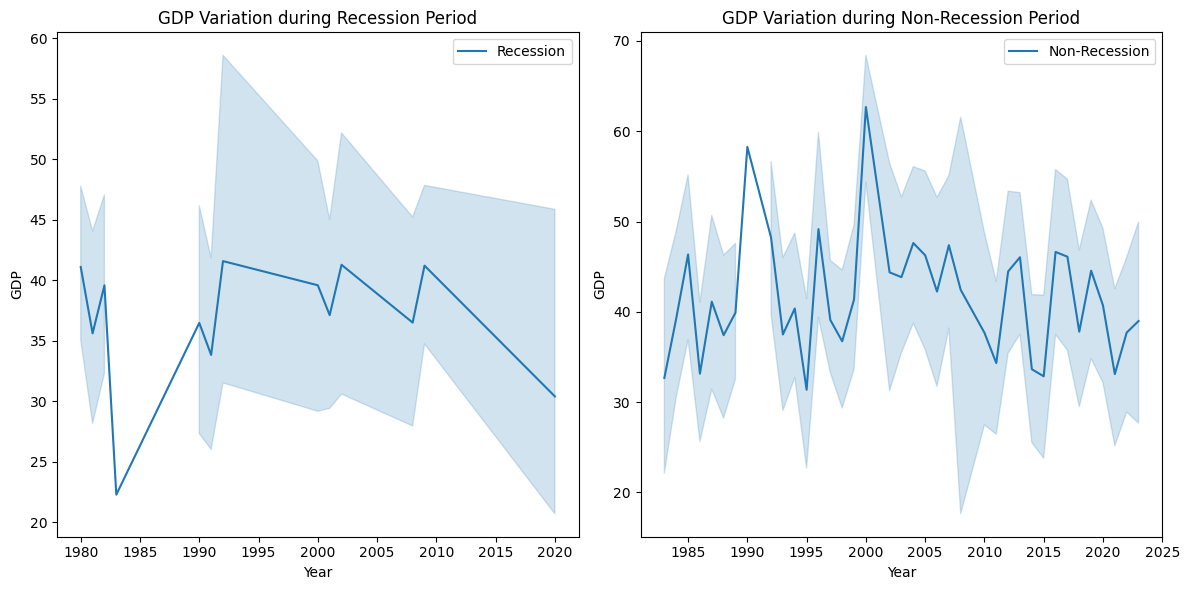

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplots
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

#### TASK 1.5: Develop a Bubble plot

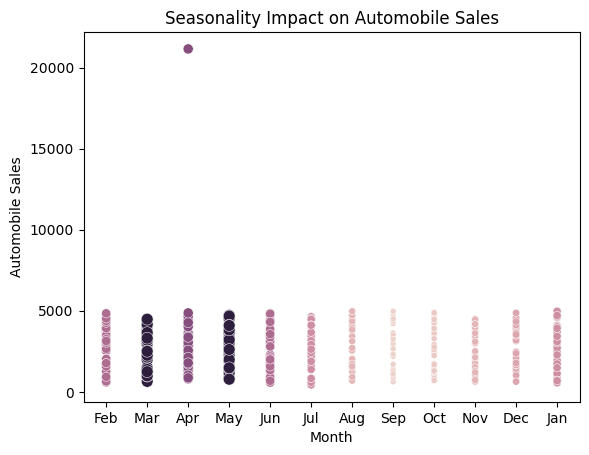

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter non-recession data
non_rec_data = df[df['Recession'] == 0]

# Size for bubble effect
size = non_rec_data['Seasonality_Weight']

# Scatter plot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

#### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot

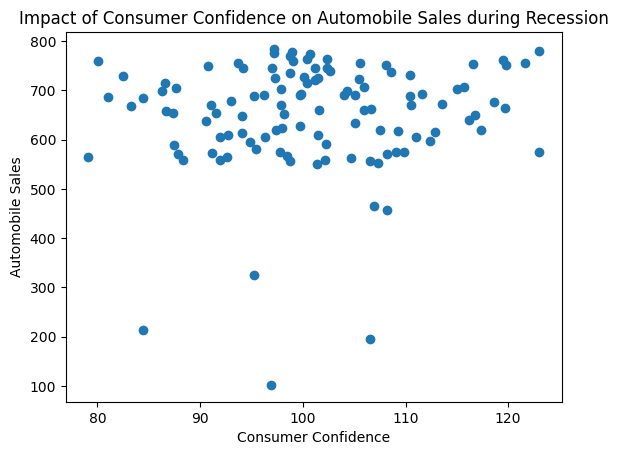

In [30]:
import matplotlib.pyplot as plt

# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Impact of Consumer Confidence on Automobile Sales during Recession')

plt.show()

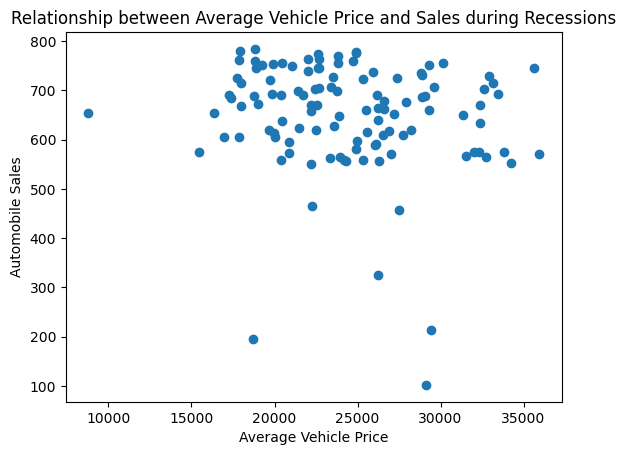

In [31]:
import matplotlib.pyplot as plt

# Create dataframe for recession period
rec_data = df[df['Recession'] == 1]

# Scatter plot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

#### TASK 1.7: Create a pie chart 

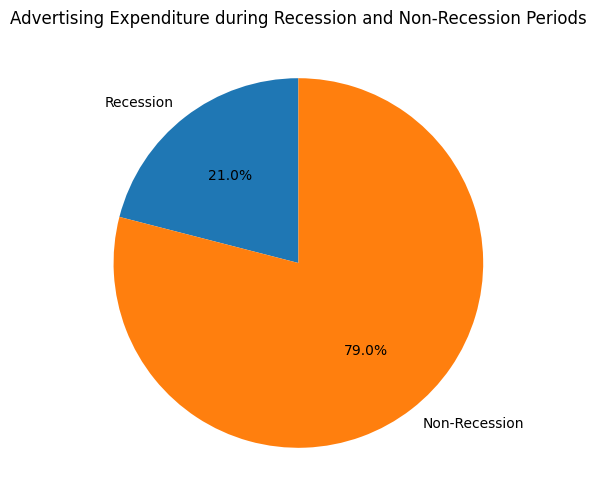

In [32]:
import matplotlib.pyplot as plt

# Filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

#### TASK 1.8: Develop a pie chart

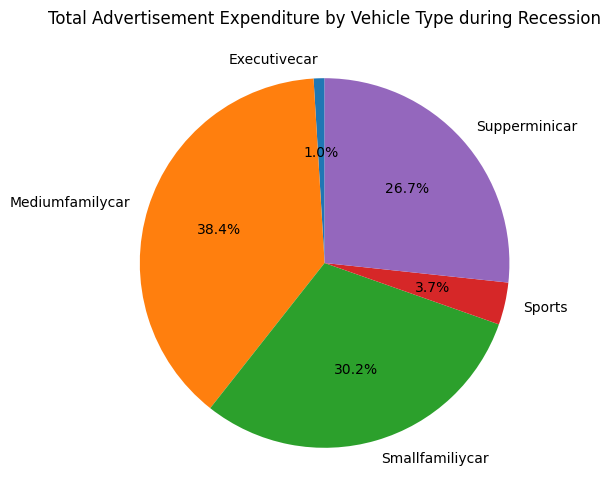

In [33]:
import matplotlib.pyplot as plt

# Filter the data
Rdata = df[df['Recession'] == 1]

# Calculate the total advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recession')

plt.show()

#### TASK 1.9: Develop a lineplot

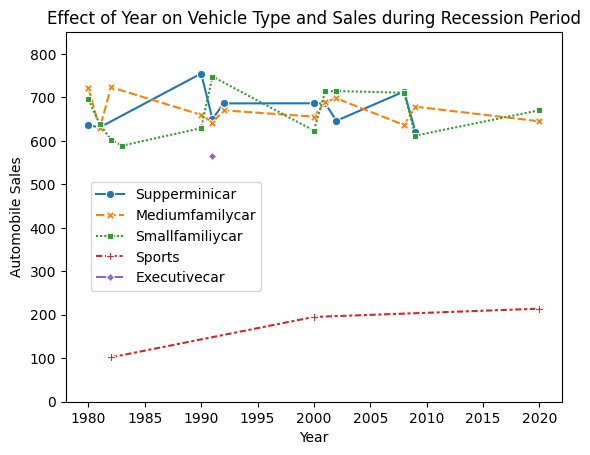

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Line plot
sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers=True, err_style=None)

plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Effect of Year on Vehicle Type and Sales during Recession Period')

plt.show()

#### OPTIONAL : TASK 1.10 Create a map